# Metapodaci

"Exif" format fields to be examined:

**'Exposure time'** or 'shutter speed' it the time in seconds that the camera's sensor was exposed to light. Longer exposure time is used in low-light conditions.

**'FNumber'** or aperture of the lens is a ratio of the focal length to the effective aperture diameter. It controls the depth of the field and the amount of light entering the lens resulting in more blury or more clear background.

**'ExposureProgram'**  The class of the program used by the camera to set exposure when the picture is taken. 
Options: { "NOT_DEFINED", "MANUAL", "NORMAL", "APERTURE_PRIORITY", "SHUTTER_PRIORITY", "CREATIVE_PROGRAM", "ACTION_PROGRAM",
    "PORTRAIT_MODE", "LANDSCAPE_MODE" };

**'ISOSpeedRatings'**  	Indicates the ISO Speed and ISO Latitude of the camera or input device as specified in ISO 12232. Higher ISO is used in low-light conditions.

**'ShutterSpeedValue'** This is a logarithmic representation of the exposure time. It's often used internally by camera systems to simplify calculations. It is a more technical value, often derived from ExposureTime

**'ApertureValue'** This is a logarithmic representation of the FNumber.

**'BrightnessValue'** An estimated measure of the brightness of the subject, calculated in EV (Exposure Value) units. It provides a rough idea of the light conditions of the scene at the time of capture.

**'ExposureBiasValue'**  The exposure bias. The units is the APEX value. Ordinarily it is given in the range of -99.99 to 99.99. This tells you if the photographer over- or underexposed the image intentionally to achieve a certain look or to compensate for a tricky lighting situation.

**'MaxApertureValue'** The smallest F number of the lens. It tells you the light-gathering capability of the lens. 

**'MeteringMode'** This describes how the camera measured the light to determine the exposure. 

**'Flash'** Indicates the status of flash when the image was shot.

**'FocalLength'** The actual focal length of the lens, in mm.

**'ColorSpace'** The color space information tag is always recorded as the color space specifier. Normally sRGB is used to define the color space based on the PC monitor conditions and environment. 

**'ExposureMode'** his indicates whether the exposure was determined automatically, manually, or was a bracketed exposure. Similar to ExposureProgram, this gives insight into the photographer's control over the exposure settings.

**'WhiteBalance'** Correct white balance ensures that white objects appear white in the image, regardless of the light source color. This field tells you if the camera automatically adjusted for the light or if the photographer set it manually.

**'DigitalZoomRatio'** This tag indicates the digital zoom ratio when the image was shot. If the numerator of the recorded value is 0, this indicates that digital zoom was not used.

**'FocalLengthIn35mmFilm'** This tag indicates the equivalent focal length assuming a 35mm film camera, in mm. A value of 0 means the focal length is unknown.

**'SceneCaptureType'** This tag indicates the type of scene that was shot. It can also be used to record the mode in which the image was shot. 

## Analiza

Na temelju dobivenih opisa, možemo pretpostaviti koje značajke su nam možda od manjeg značaja. Konkretno, ovdje bih pretpostavila da su ExposureTime i FNumber s obzirom da imamo njihovu logaritamsku vrijednost izvedenu u ShutterSpeedValue i ApertureValue.

ExposureBiasValue s obzirom da on indicira vlastito upletanja u exposure a naše su sve slike automatski fotografirane, za ovo treba razmisliti jer možda nam treba dataset s namještenim vrijednostima ove značajke.

MaxApertureValue, FocalLength, FocalLength35mmFilm s obirom da su to specifikacije same kamere a ne mislim da nam je tako nešto nužno za estimaciju same boje. Eventualno MaxApertureValue.

ExposureProgram i ExposureMode govore o postavci koja je korištena prilikom fotografiranja, ručno ili automatsko fotografiranje npr, za što ne mislim da su relevantni podatci. Isto i za WhiteBalance.

SceneCaptureType također djeluje suvišno.



In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyciede2000 import ciede2000

učitavanje podataka:

In [312]:
data = pd.read_csv('data.csv')
data.head()

,L,a,b,ExposureTime,FNumber,ExposureProgram,ISOSpeedRatings,ShutterSpeedValue,ApertureValue,BrightnessValue,...,ExposureMode,WhiteBalance,DigitalZoomRatio,FocalLengthIn35mmFilm,SceneCaptureType,Make,Model,L-true,a-true,b-true
0,80.081170,-0.191347,0.521780,0.008264,1.9,2,50,6.92244,1.851999,5.230012,...,0,0,0.0,30,0,Apple,iPhone 15 Pro Max,73.831440,4.919629,6.934942
1,78.909060,0.938682,2.025307,0.008264,1.9,2,50,6.92244,1.851999,5.308230,...,0,0,0.0,30,0,Apple,iPhone 15 Pro Max,72.794525,6.550133,9.850800
2,77.205030,0.734219,3.486903,0.008264,1.9,2,50,6.92244,1.851999,5.317552,...,0,0,0.0,30,0,Apple,iPhone 15 Pro Max,73.297900,8.309430,13.930820
3,75.668290,0.371024,-1.005916,0.008264,1.9,2,50,6.92244,1.851999,5.345574,...,0,0,0.0,30,0,Apple,iPhone 15 Pro Max,71.949615,6.289175,8.049189
4,77.774055,3.067463,2.398984,0.008264,1.9,2,64,6.92244,1.851999,5.070332,...,0,0,0.0,30,0,Apple,iPhone 15 Pro Max,72.285800,7.187121,13.533483


Distribucija podataka po modelu i značajkama:

In [313]:
# izabrane značajke čiju distribuciju analiziram:

features = [
    "ExposureTime", "FNumber", "ExposureProgram", "ISOSpeedRatings", "ShutterSpeedValue",
    "ApertureValue", "BrightnessValue", "ExposureBiasValue", "MaxApertureValue",
    "MeteringMode", "Flash", "FocalLength", "ColorSpace", "ExposureMode",
    "WhiteBalance", "DigitalZoomRatio", "FocalLengthIn35mmFilm", "SceneCaptureType"
]

# grupirani podatci po modelu mobitela:

grouped = data.groupby('Make')

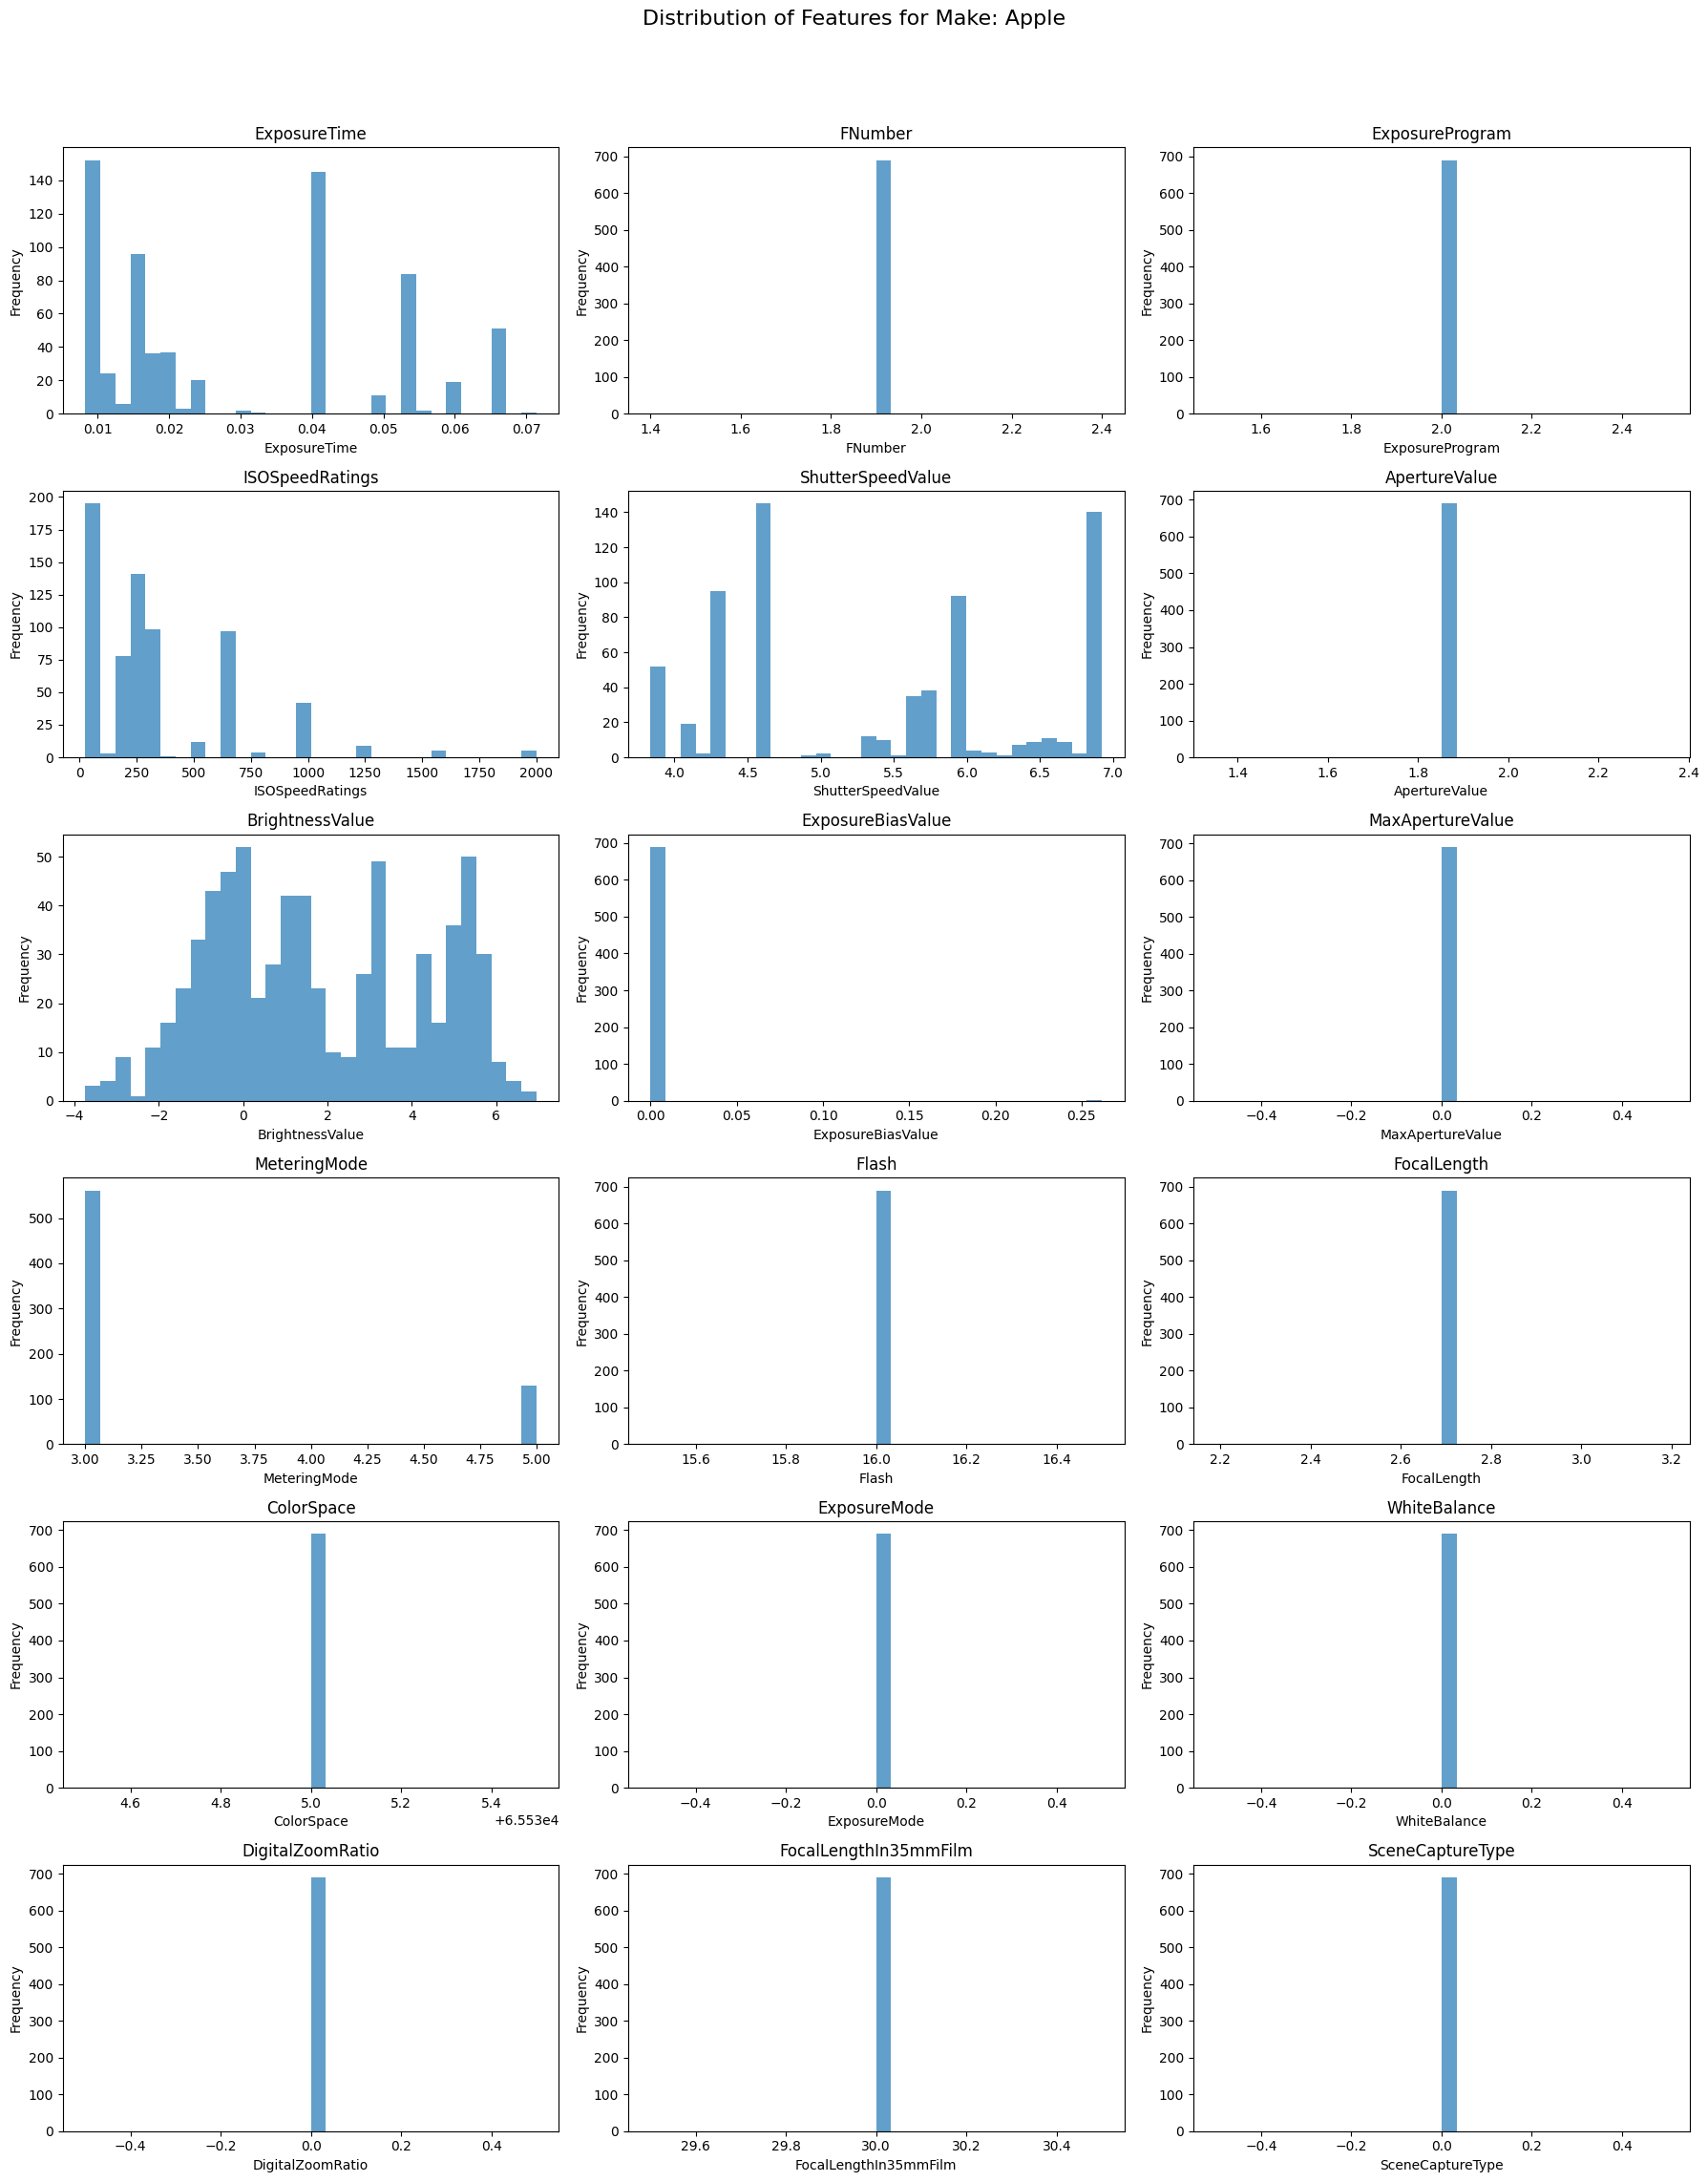

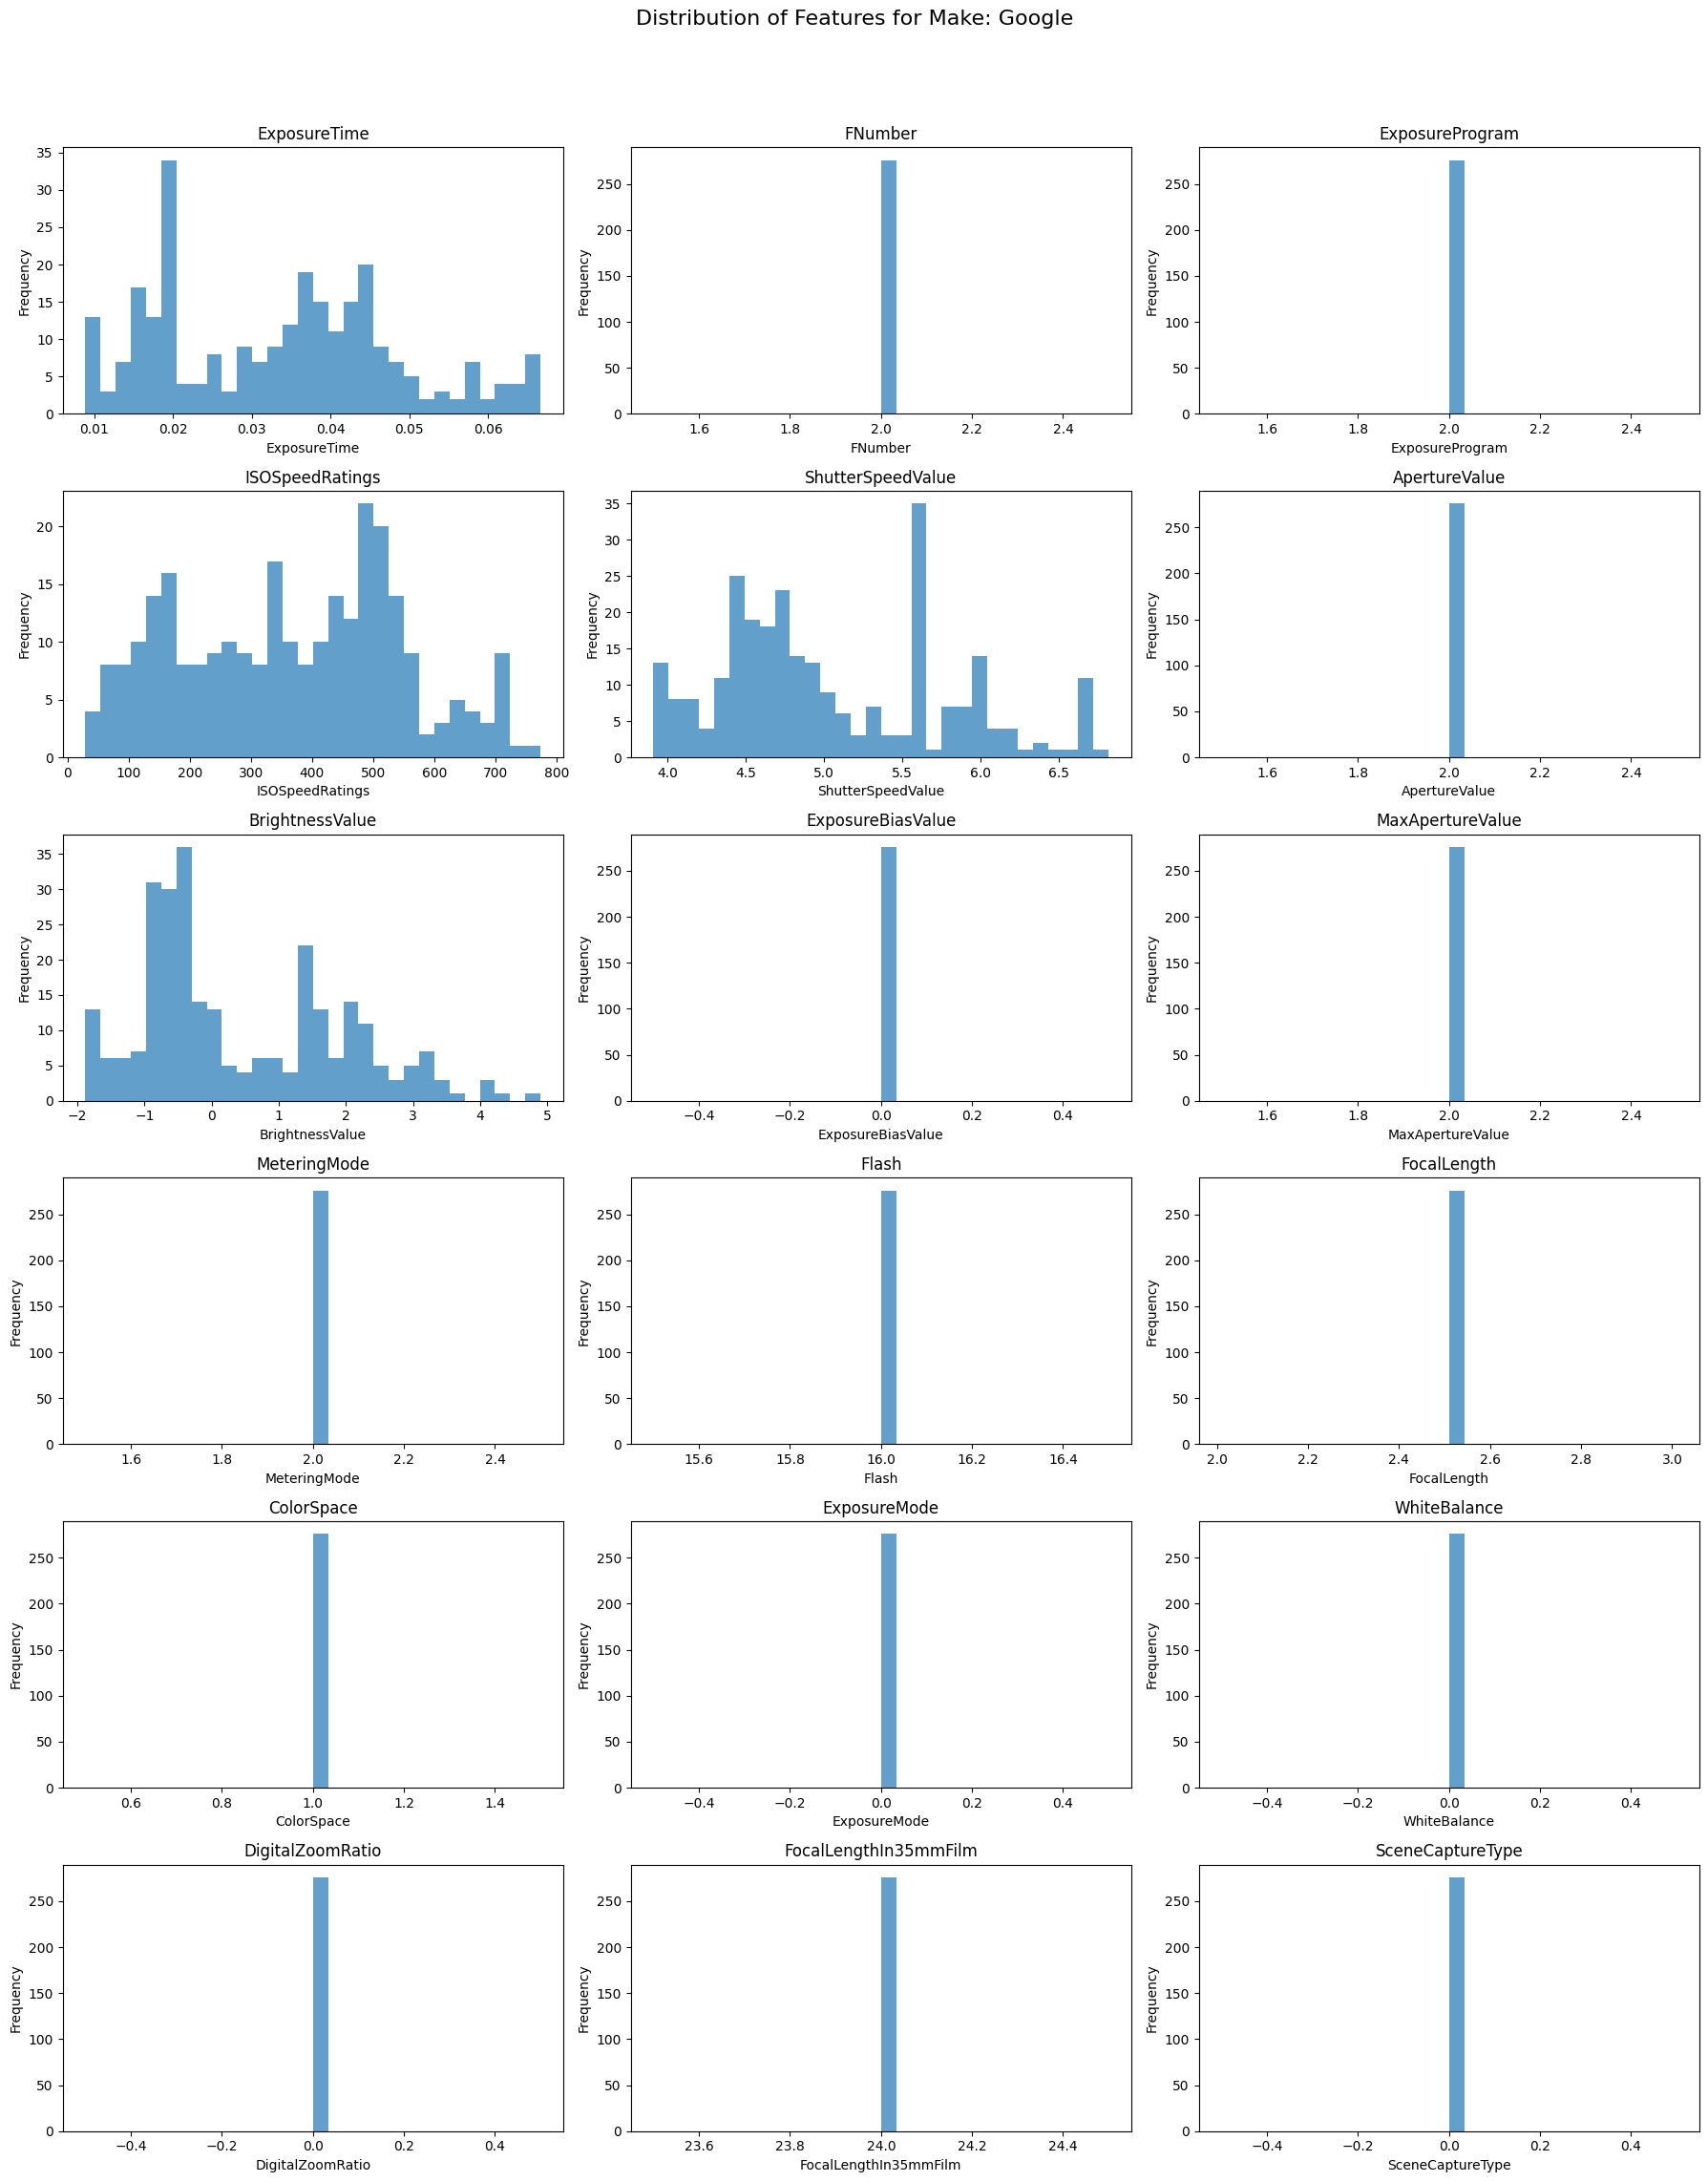

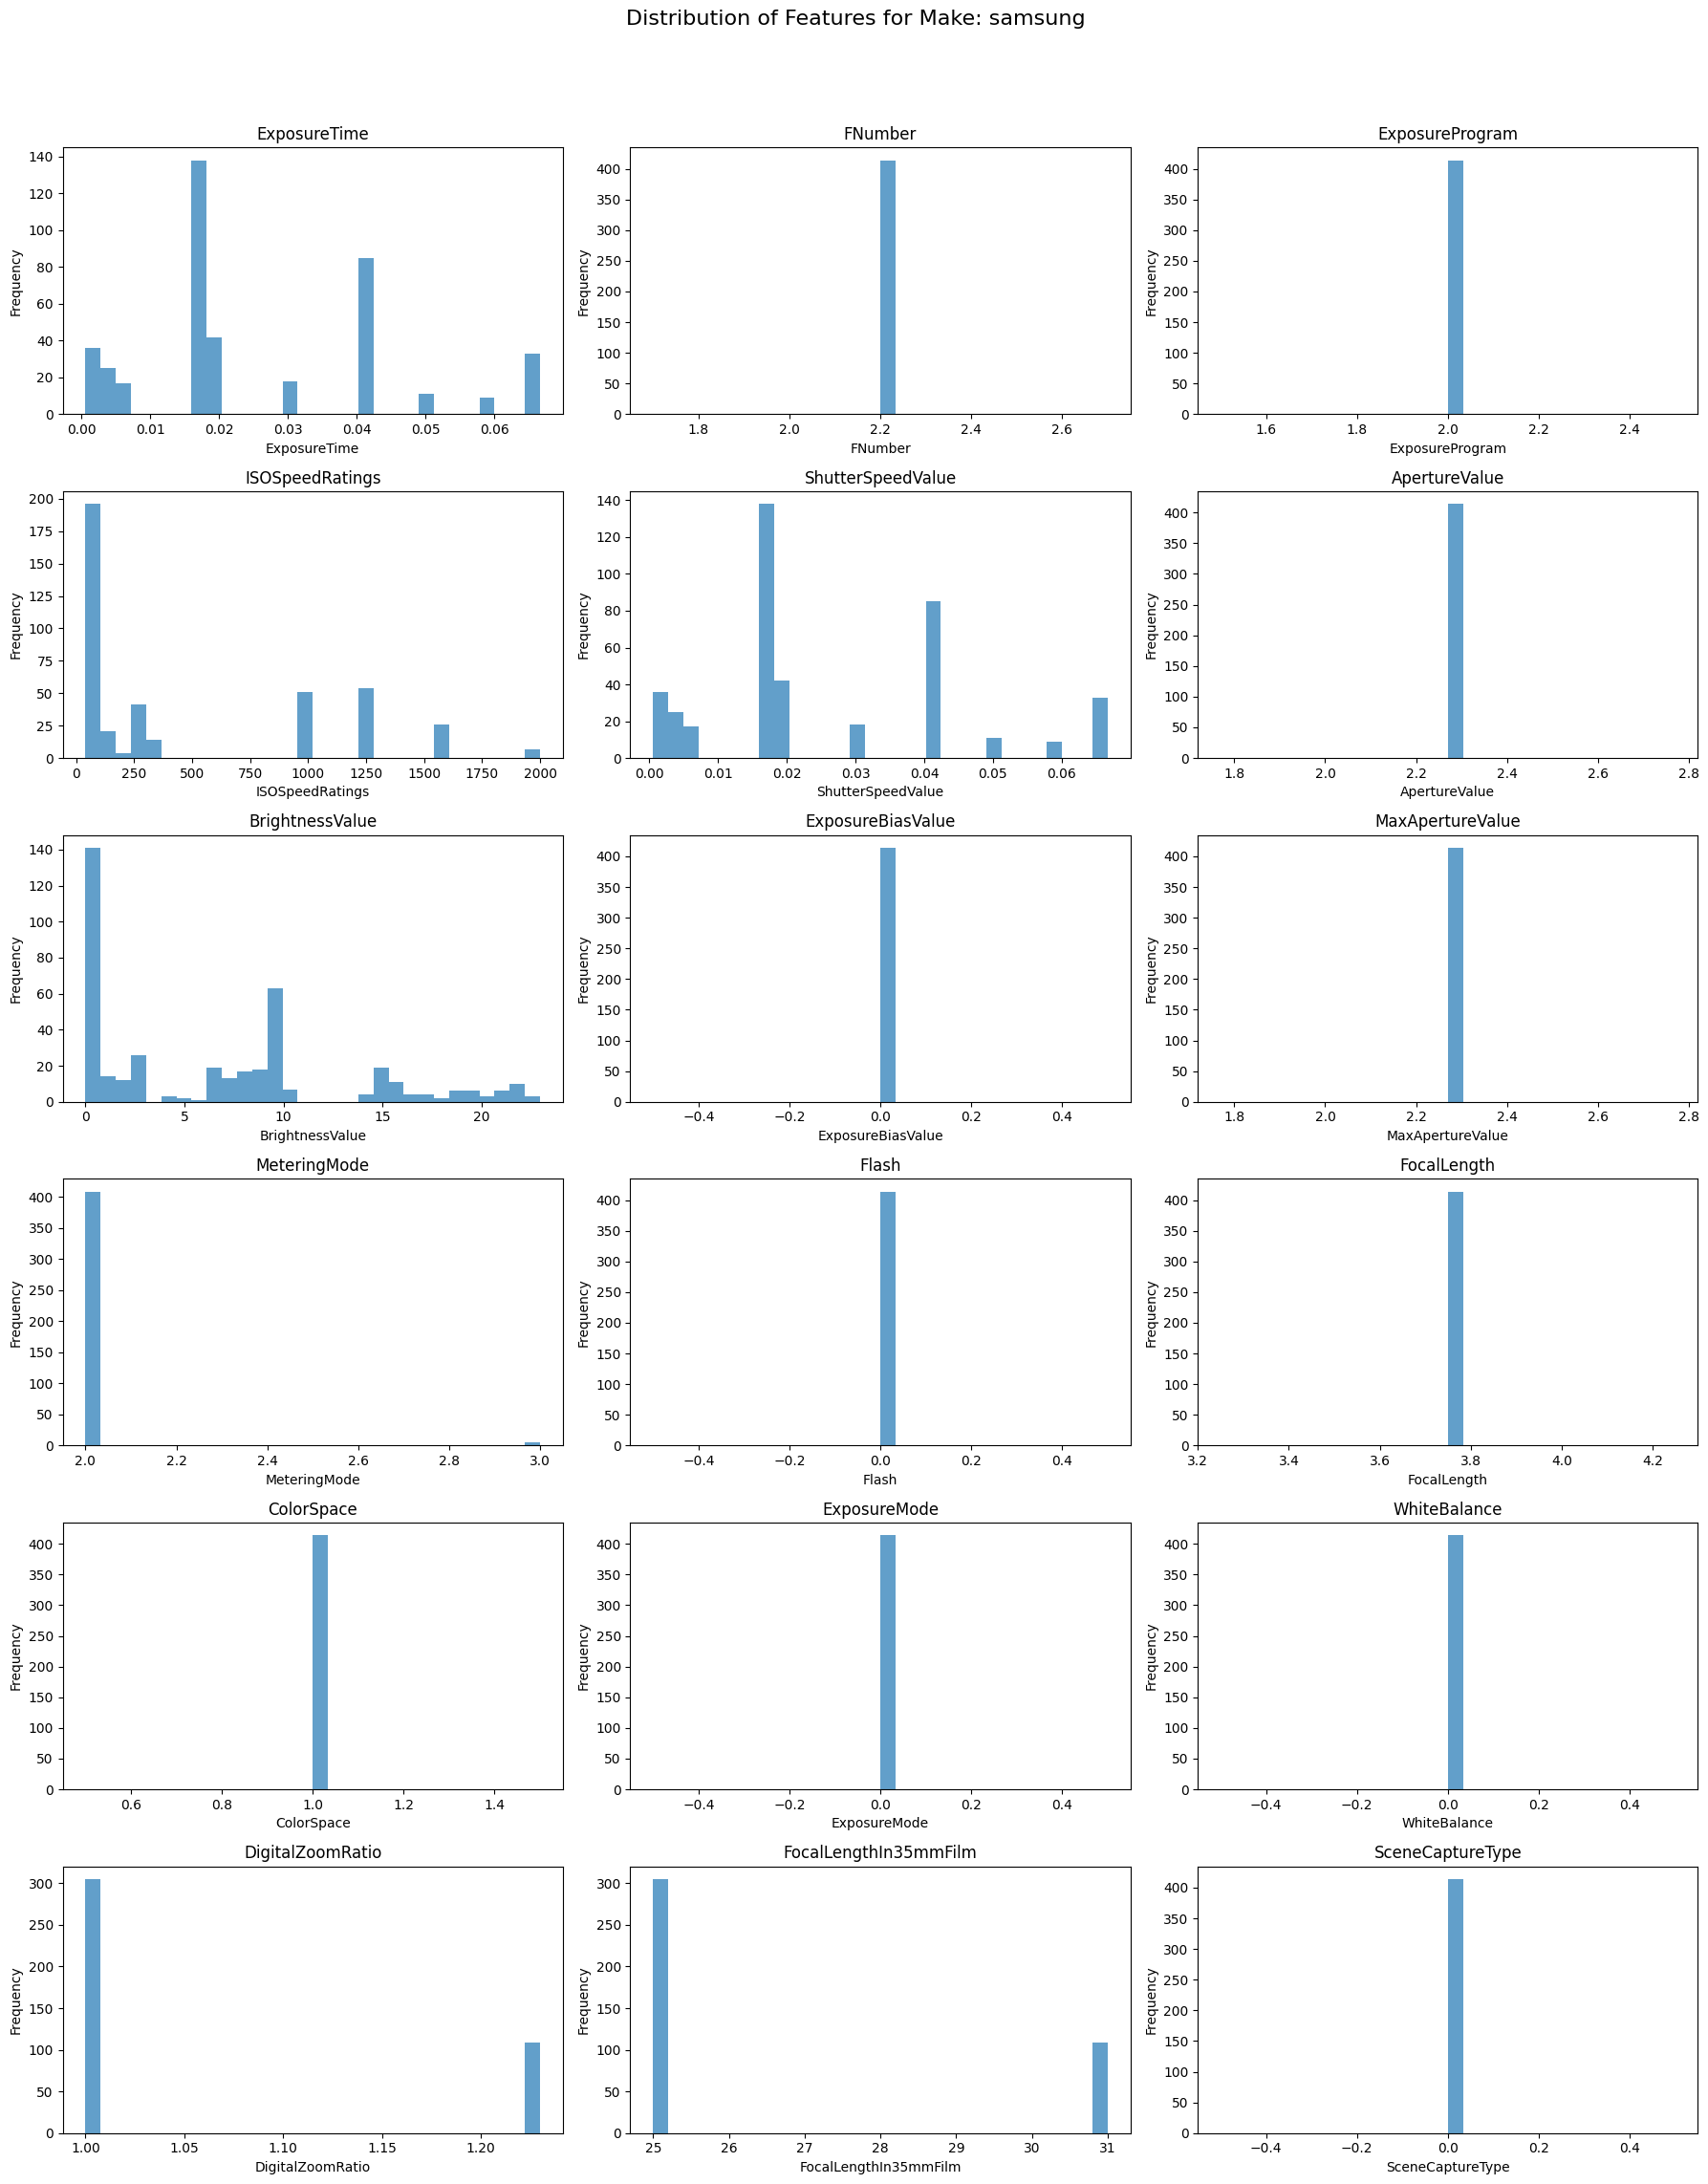

In [314]:
# Plot distribucija za svaku značajku:

for make, group in grouped:
    fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
    fig.suptitle(f'Distribution of Features for Make: {make}', fontsize=16)
    axes = axes.flatten()
    for i, feature in enumerate(features):
        if feature in group.columns:
            group[feature].plot(kind='hist', ax=axes[i], bins=30, alpha=0.7)
            axes[i].set_title(feature)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].set_visible(False)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Većina značajki monotona je za pojedini model što nam ne daje dovoljno informacija. Također, mjere za određene značajke razlikuju se međusobno za različite modele mobitela.

Za sad ostavljam značajke: 
- ExposureTime
- ISOSpeedRatings
- ShutterSpeedValue
- BrightnessValue

In [315]:
# selected features

selected_features = ['ExposureTime', 'ISOSpeedRatings', 'ShutterSpeedValue', 'BrightnessValue']

Matrica korelacije odabranih značajki kako bi se ustanovila mogućnost njihovih međuovisnosti:

In [316]:
reduced_data = data[selected_features]
reduced_data.head()

,ExposureTime,ISOSpeedRatings,ShutterSpeedValue,BrightnessValue
0,0.008264,50,6.92244,5.230012
1,0.008264,50,6.92244,5.308230
2,0.008264,50,6.92244,5.317552
3,0.008264,50,6.92244,5.345574
4,0.008264,64,6.92244,5.070332


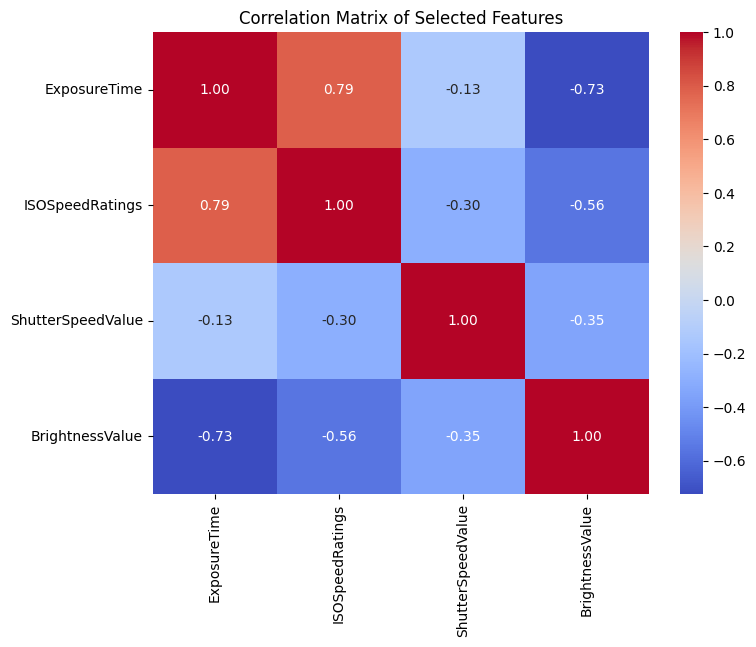

In [317]:
correlation_matrix = reduced_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

Može se vidjeti visoka zavisnost između ExposureTime i ISOSpeedRating-a što i ima smisla jer kraći shutter speed se koristi u uvijetima većeg osvjetljenja kao i niža vrijednost ISO. Postoji i jaka negativna korelacija između ExposureTime i BrightnessValue jer su one obrnuto proporcionalne. Značajna je zavisnost i između ISO i BrigtnessValue-a.

Djeluje da bi se značajka ExposueTime mogla ukloniti iz dataseta.

In [318]:
print(reduced_data.describe())

       ExposureTime  ISOSpeedRatings  ShutterSpeedValue  BrightnessValue
count   1380.000000      1380.000000        1380.000000      1380.000000
mean       0.029544       389.171014           3.725227         2.935310
std        0.018574       406.525974           2.558432         4.764839
min        0.000579        25.000000           0.000579        -3.743371
25%        0.016667        80.000000           0.041667        -0.062989
50%        0.020000       250.000000           4.644217         1.420548
75%        0.041667       536.500000           5.743443         4.848453
max        0.071429      2000.000000           6.922440        22.960000


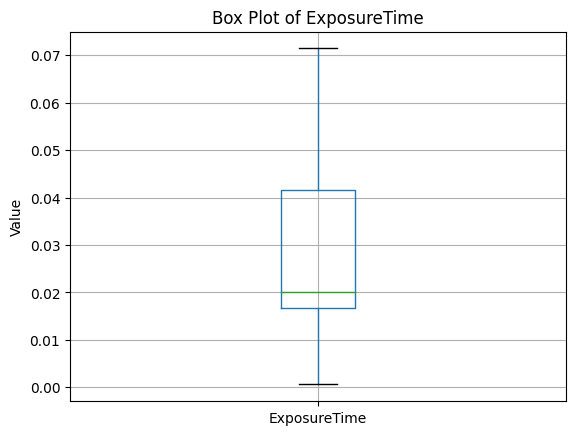

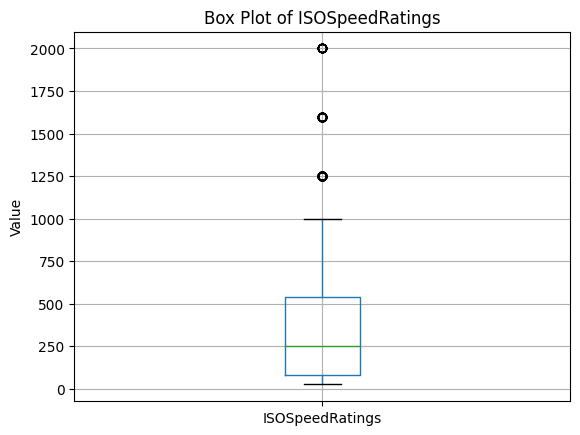

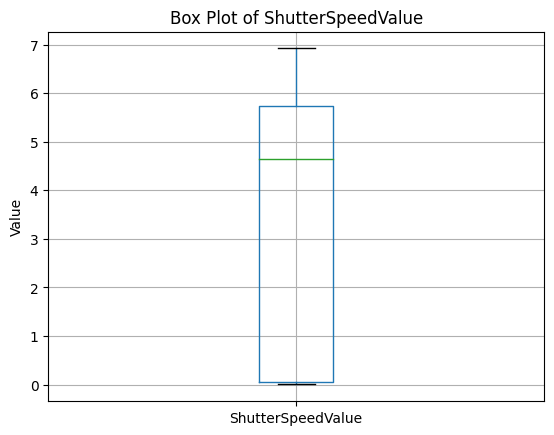

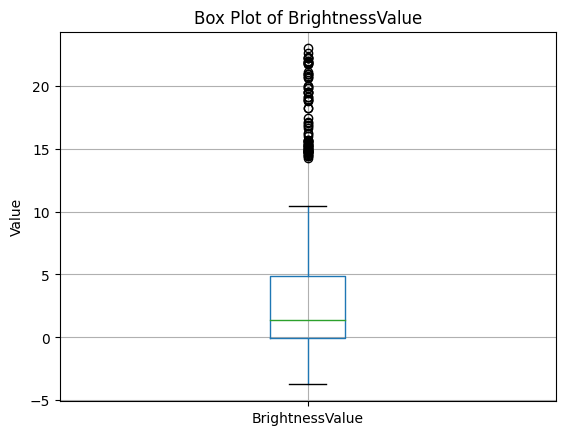

In [319]:
# box plot for each of selected features

for feature in selected_features:
    reduced_data.boxplot(column=feature)
    plt.title(f"Box Plot of {feature}")
    plt.ylabel("Value")
    plt.xticks()
    plt.show()

## Prikaz Lab vrijednosti izmjerenih i stvarnih

In [320]:
lab_features = ['L', 'a', 'b', 'L-true', 'a-true', 'b-true']
lab_data = data[lab_features]

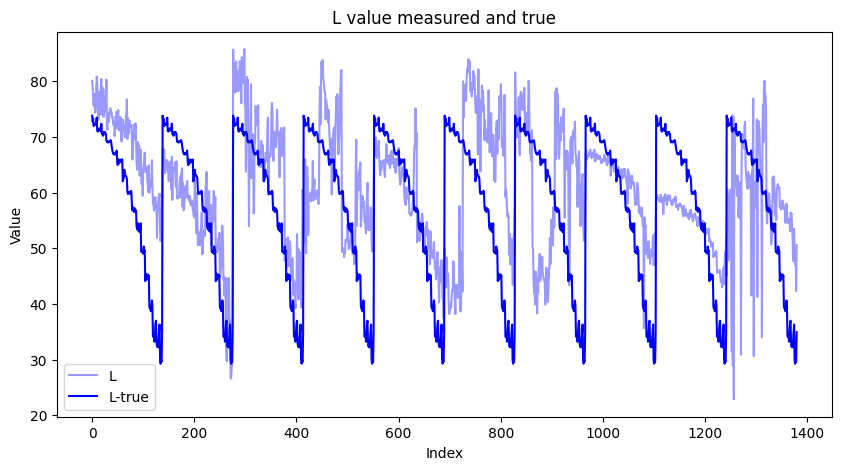

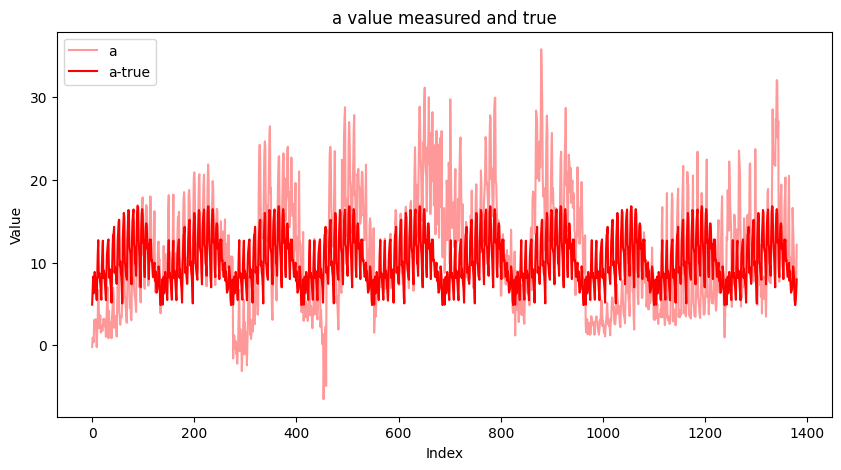

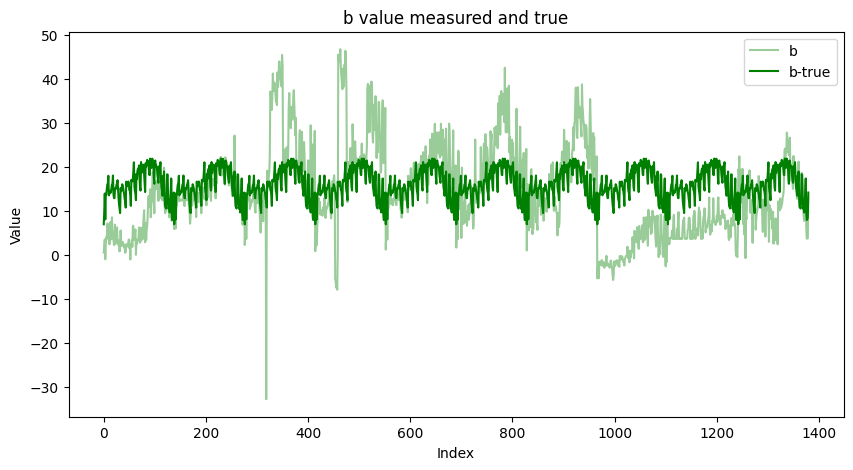

In [321]:
plt.figure(figsize=(10, 5))
plt.plot(lab_data['L'], label='L', color='blue', alpha=0.4)
plt.plot(lab_data['L-true'], label='L-true', color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('L value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lab_data['a'], label='a', color='red', alpha=0.4)
plt.plot(lab_data['a-true'], label='a-true', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('a value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(lab_data['b'], label='b', color='green', alpha=0.4)
plt.plot(lab_data['b-true'], label='b-true', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('b value measured and true')
plt.legend()
plt.show()


Loss funkcija za usporedbu udaljenosti predviđene i stvarne LAB vrijednosti boja:

In [322]:
def loss(L_true, a_true, b_true, L_measured, a_measured, b_measured):
    return ciede2000((L_true, a_true, b_true), (L_measured, a_measured, b_measured))['delta_E_00']

Usporedba udaljenosti izmjerene i stvarne boje:

In [323]:
relevant_features = ['ExposureTime', 'ISOSpeedRatings', 'ShutterSpeedValue', 'BrightnessValue', 'L', 'a', 'b', 'L-true', 'a-true', 'b-true', 'difference', 'Make']

In [324]:
data['difference'] = data.apply(lambda x: loss(x['L-true'], x['a-true'], x['b-true'], x['L'], x['a'], x['b']), axis=1)
sorted_data = data.sort_values(by='difference', ascending=False)
sorted_data[relevant_features].head()

,ExposureTime,ISOSpeedRatings,ShutterSpeedValue,BrightnessValue,L,a,b,L-true,a-true,b-true,difference,Make
1256,0.001031,40,0.001031,20.77,22.882910,9.166241,-0.750620,71.552980,8.761308,14.159968,49.050127,samsung
1254,0.001063,40,0.001063,20.72,28.916048,7.328980,4.597441,71.011310,12.716345,14.019134,42.718149,samsung
1252,0.001326,40,0.001326,19.96,31.470222,4.642348,6.928701,71.112200,8.533890,13.513726,39.789566,samsung
1270,0.001078,40,0.001078,20.61,30.878206,4.682492,2.729202,69.313416,8.707221,14.786764,39.484768,samsung
699,0.009996,42,6.640000,4.90,38.192947,19.925793,13.851089,73.472080,5.478241,17.954376,35.718996,Google


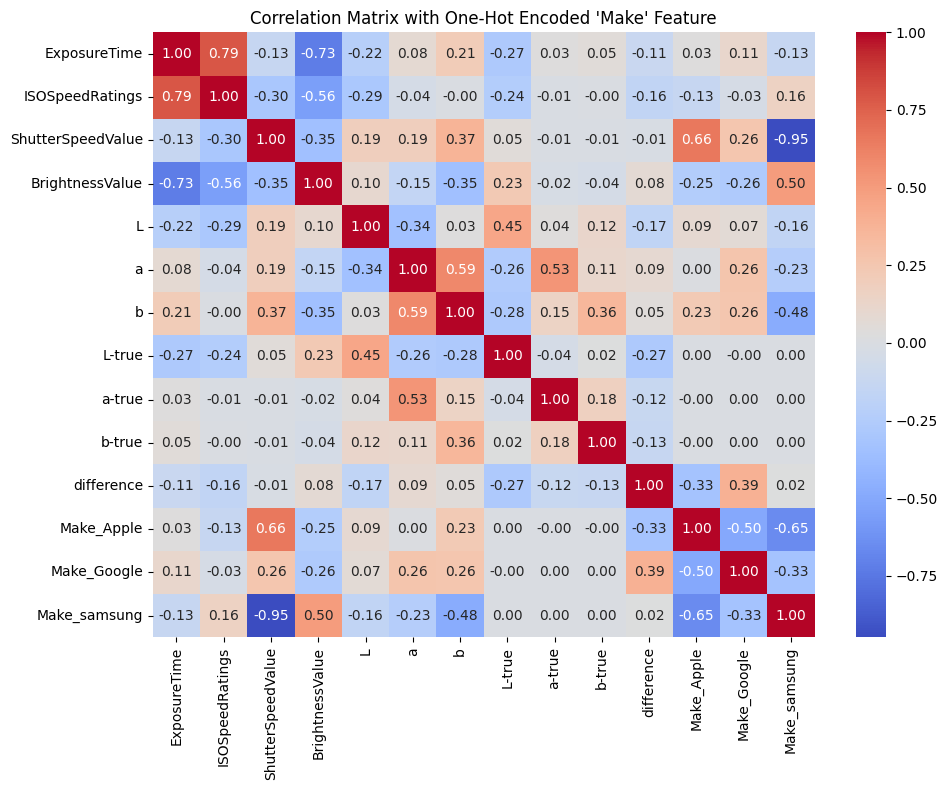

In [325]:
# correlation matrix

one_hot_encoded_data = pd.get_dummies(sorted_data[relevant_features], columns=['Make'], dtype=int)
correlation_matrix_one_hot = one_hot_encoded_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_one_hot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with One-Hot Encoded 'Make' Feature")
plt.tight_layout()


Za sad se čini da je najveća korelacija greške u podatcima objašnjiva modelom google mobitela.

## Pokušaji jednostavnih modela

In [326]:
features = ['ISOSpeedRatings', 'ShutterSpeedValue', 'BrightnessValue', 'L', 'a', 'b', 'L-true', 'a-true', 'b-true', 'Make']

In [327]:
from sklearn.preprocessing import MinMaxScaler

one_hot_data = pd.get_dummies(data[features], columns=['Make'], dtype=int)
features_to_scale = [col for col in one_hot_data.columns if 'Make_' not in col]
one_hot_features = [col for col in one_hot_encoded_data.columns if 'Make_' in col]

Podjela seta na labele i podatke:

In [328]:
X = one_hot_data[['ISOSpeedRatings', 'ShutterSpeedValue', 'BrightnessValue', 'L', 'a', 'b', 'Make_Apple', 'Make_Google', 'Make_samsung']]
y = one_hot_data[['L-true', 'a-true', 'b-true']]

In [329]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForest

In [330]:
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [331]:
predicted = regressor.predict(X_test)
mean_squared_error(y_test, predicted)

10.570241517782742

Skalirano:

In [332]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [333]:

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)
mean_squared_error(y_test, predicted)

10.50955581096737

Skaliranje ne pomaže modelu.

## XGBoost

In [334]:
from xgboost import XGBRegressor

model = XGBRegressor(
n_estimators=400, # number of trees
learning_rate=0.05, # step size shrinkage
max_depth=6, # tree depth
subsample=0.8, # subsample ratio
colsample_bytree=0.8, # feature sampling
random_state=42
)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
mean_squared_error(y_test, predicted)

9.187673268470563

### XBGoost s metapodatcima

Optimiranje hiperparametara u potrazi za boljim rezultatima:

In [335]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

model = XGBRegressor(objective="reg:squarederror", random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best MSE (negative): ", grid_search.best_score_)
print("Best RMSE: ", (-grid_search.best_score_) ** 0.5)

/home/internship/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/internship/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
Best MSE (negative):  -9.208980524910798
Best RMSE:  3.034630212218747


Provjera vlastite metrike i MSE nad test setom:

In [336]:
y_true_array = y_test.to_numpy(dtype=float)
pred_array = np.array(predicted, dtype=float)

delta_E_test = [
    loss(*true, *pred)
    for true, pred in zip(y_true_array, pred_array)
]

print(np.mean(delta_E_test))
print(mean_squared_error(y_true_array, pred_array))

3.3904687039627013
9.187673268470563


Čini se da naša metrika daje bolje rezultate. Potrebno je vizualizirati

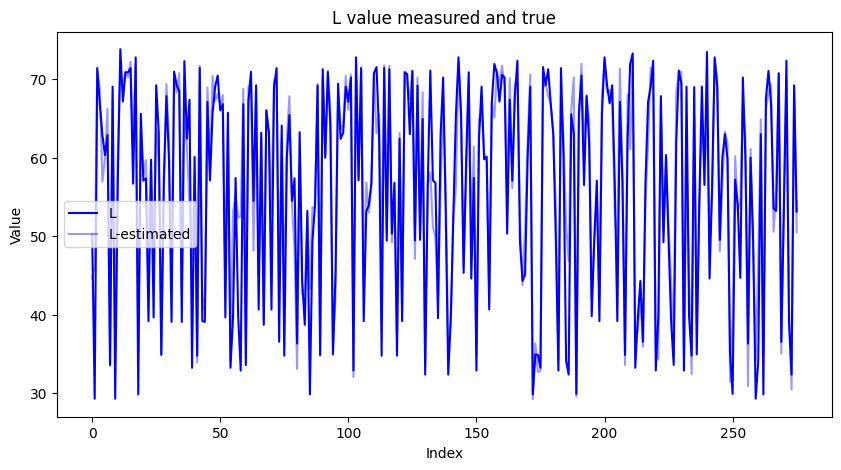

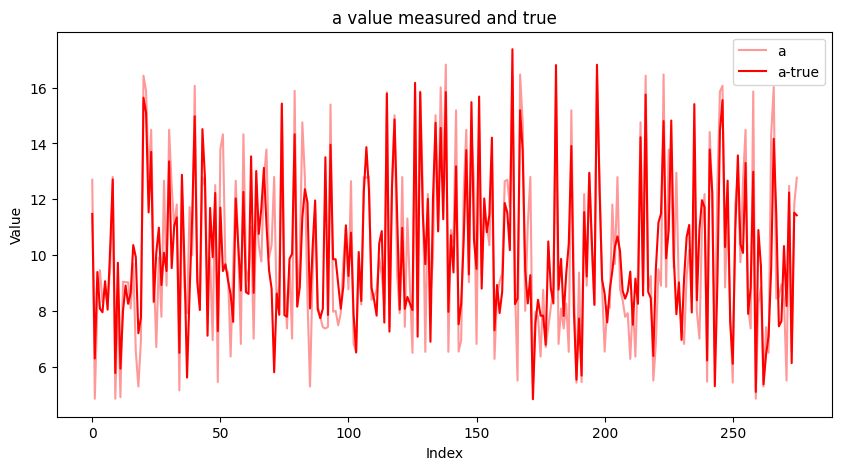

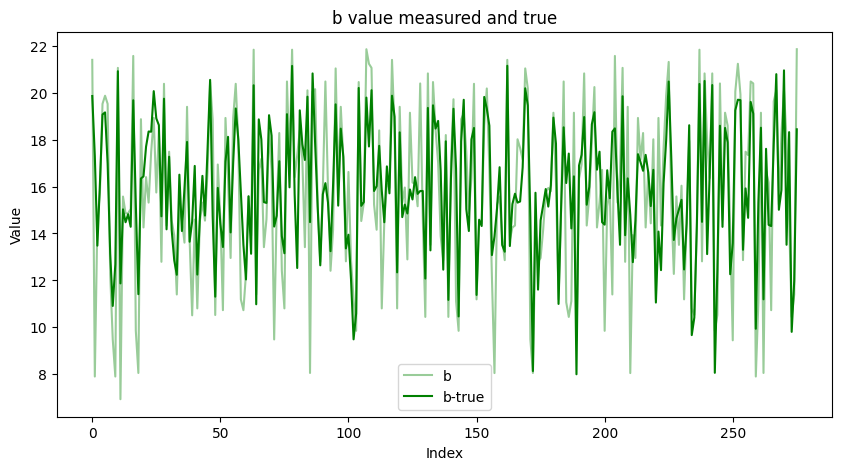

In [337]:
plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,0], label='L', color='blue')
plt.plot(pred_array[:,0], label='L-estimated', color='blue', alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('L value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,1], label='a', color='red', alpha=0.4)
plt.plot(pred_array[:,1], label='a-true', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('a value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,2], label='b', color='green', alpha=0.4)
plt.plot(pred_array[:,2], label='b-true', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('b value measured and true')
plt.legend()
plt.show()



Distribucija reziduala:

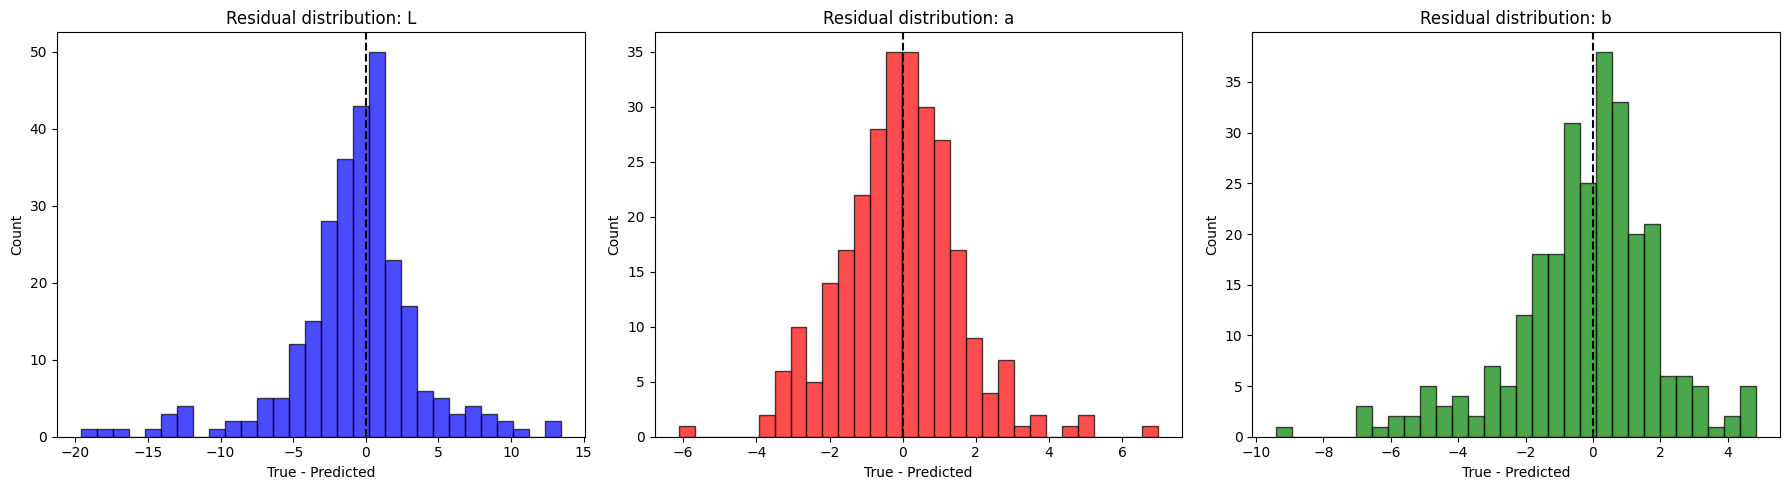

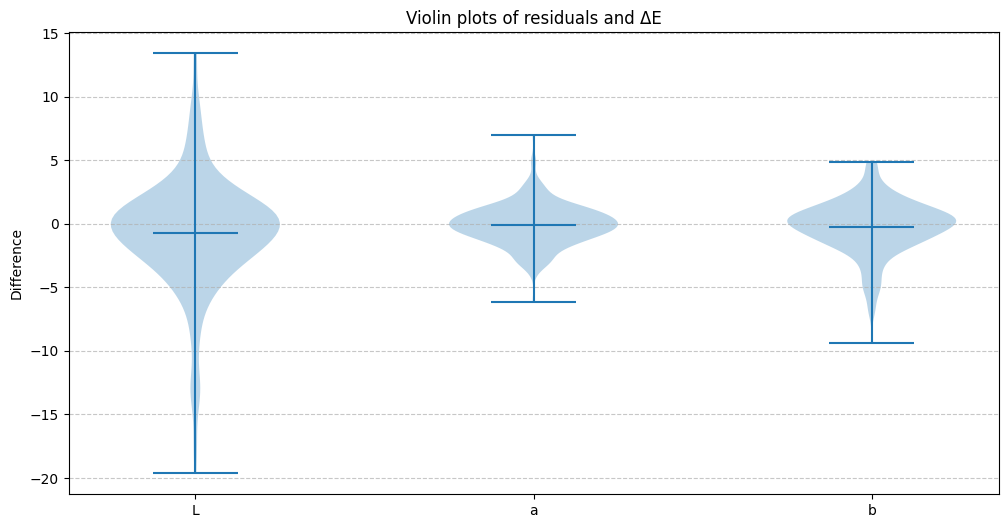

In [338]:
residuals = y_true_array - pred_array

L_residuals = residuals[:, 0]
a_residuals = residuals[:, 1]
b_residuals = residuals[:, 2]

colors = ["blue", "red", "green"]
channels = ["L", "a", "b"]

plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(residuals[:, i], bins=30, color=colors[i], alpha=0.7, edgecolor='black')
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f"Residual distribution: {channels[i]}")
    plt.xlabel("True - Predicted")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


labels = ["L residuals", "a residuals", "b residuals"]

plt.figure(figsize=(12, 6))
plt.violinplot([L_residuals, a_residuals, b_residuals],showmeans=True)
plt.xticks([1,2,3], ["L", "a", "b"])
plt.title("Violin plots of residuals and ΔE")
plt.ylabel("Difference")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Analiza dobivenih rezultata kroz vizualizaciju dobivenih predikcija:

In [339]:
from skimage import color

def lab_to_rgb(lab):
    lab = np.array([[lab]], dtype=float)  # shape (1, 1, 3)
    rgb = color.lab2rgb(lab)                     # returns shape (1, 1, 3)
    return rgb[0, 0]  

def draw_sample(sample_true, sample_pred):
    rgb_true = lab_to_rgb(sample_true)
    rgb_pred = lab_to_rgb(sample_pred)

    square_size = 50
    true_square = np.ones((square_size, square_size, 3)) * rgb_true
    pred_square = np.ones((square_size, square_size, 3)) * rgb_pred 

    fig, axes = plt.subplots(1, 2, figsize=(4, 2))

    axes[0].imshow(true_square)
    axes[0].set_title(f"True Color")
    axes[0].axis("off")

    axes[1].imshow(pred_square)
    axes[1].set_title(f"Predicted Color")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


Prikaz dvadeset najgore predviđenih boja:

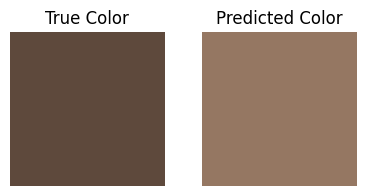

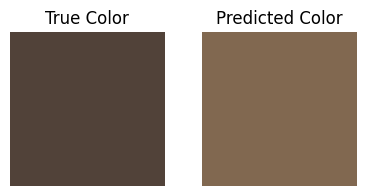

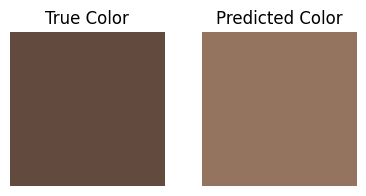

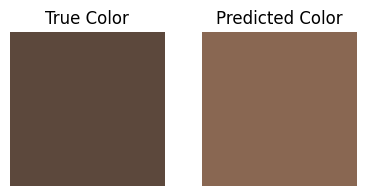

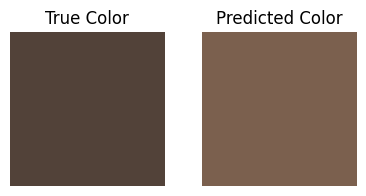

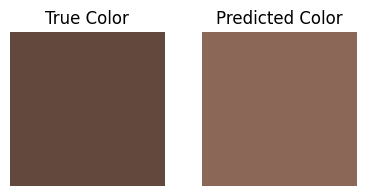

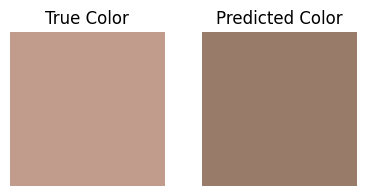

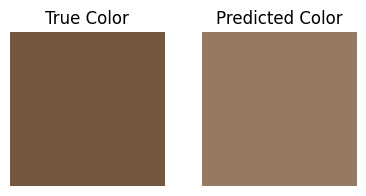

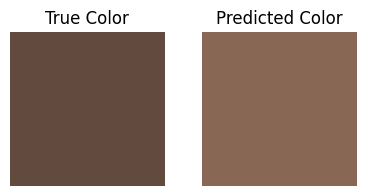

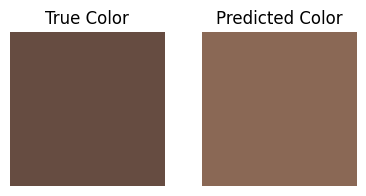

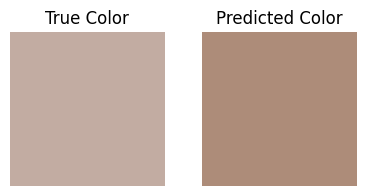

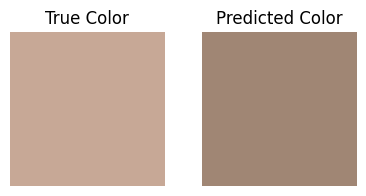

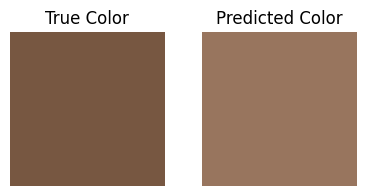

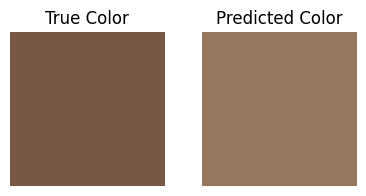

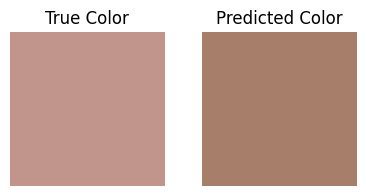

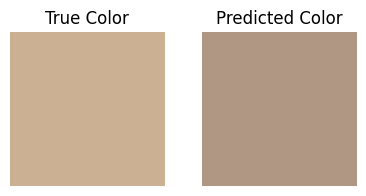

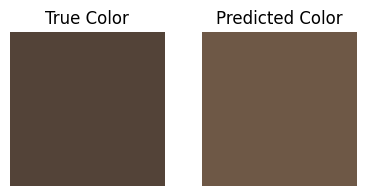

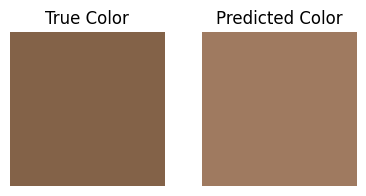

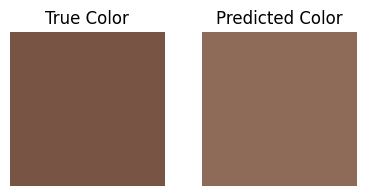

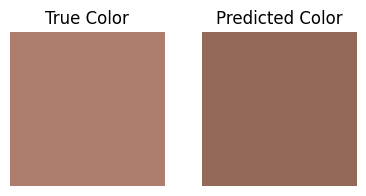

In [340]:
residual_magnitudes = np.linalg.norm(residuals, axis=1)
residual_magnitudes_order = np.argsort(-residual_magnitudes)

for idx in residual_magnitudes_order[:20]:
    draw_sample(y_true_array[idx], pred_array[idx])

Rezultati su zadovoljavajući. Treba provjeriti jesu li tome pripomogli metapodatci u datasetu.

### XGBoost bez metapodataka

Ponavljam xgboost bez metapodataka (samo koristim mjereni L, a i b) te koristim prethodno izračunate hiperparametre:

In [341]:
# reducirane značajke na Lab 
lab_features = ['L', 'a', 'b']

X_train_reduced = X_train[lab_features]
X_test_reduced = X_test[lab_features]

model = XGBRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 500, subsample=0.5)
model.fit(X_train_reduced, y_train)
predicted = model.predict(X_test_reduced)

y_true_array = y_test.to_numpy(dtype=float)
pred_array = np.array(predicted, dtype=float)

delta_E_test = [
    loss(*true, *pred)
    for true, pred in zip(y_true_array, pred_array)
]

print(np.mean(delta_E_test))
print(mean_squared_error(y_true_array, pred_array))


7.28777063481041
37.13864776641228


Rezultati su znatno lošiji od prethodnih pogotovo ako gledamo MSE kao metriku evaluacije. Slijedi graf po kanalima:

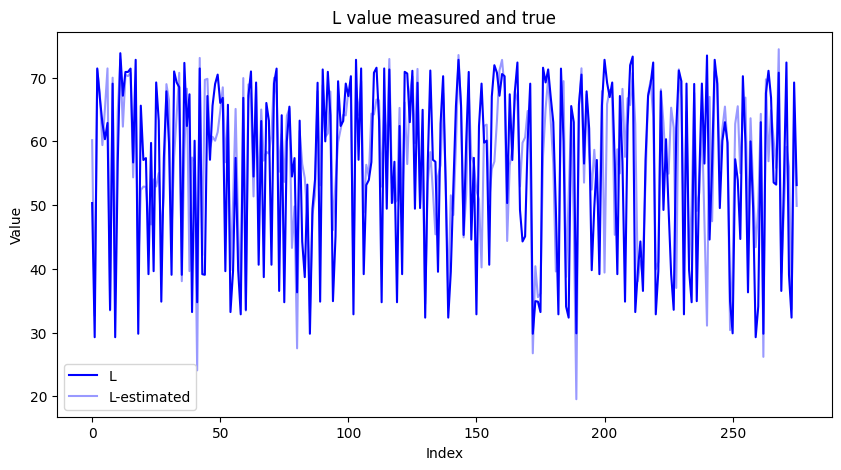

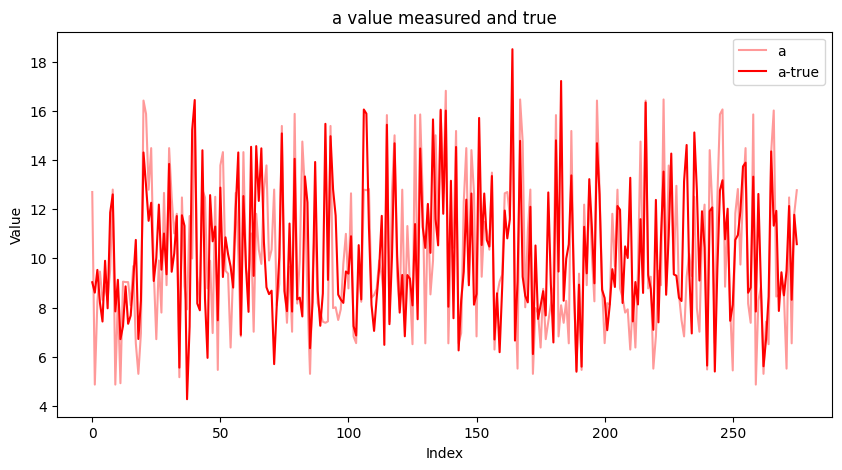

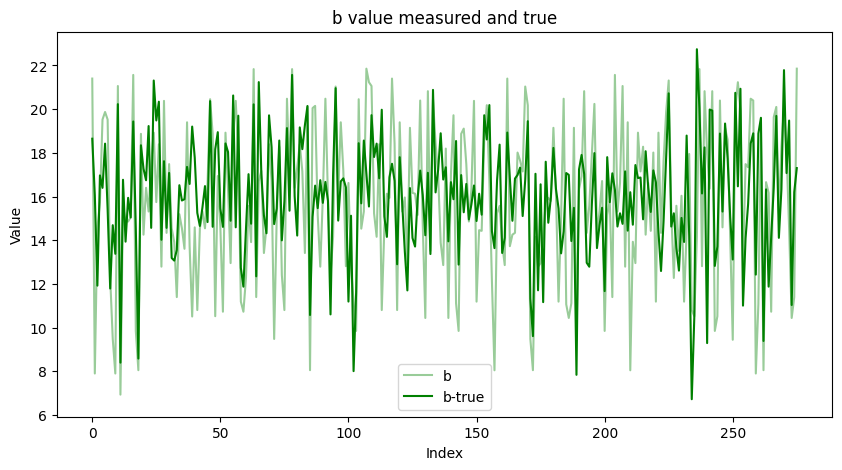

In [342]:
plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,0], label='L', color='blue')
plt.plot(pred_array[:,0], label='L-estimated', color='blue', alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('L value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,1], label='a', color='red', alpha=0.4)
plt.plot(pred_array[:,1], label='a-true', color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('a value measured and true')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_true_array[:,2], label='b', color='green', alpha=0.4)
plt.plot(pred_array[:,2], label='b-true', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('b value measured and true')
plt.legend()
plt.show()

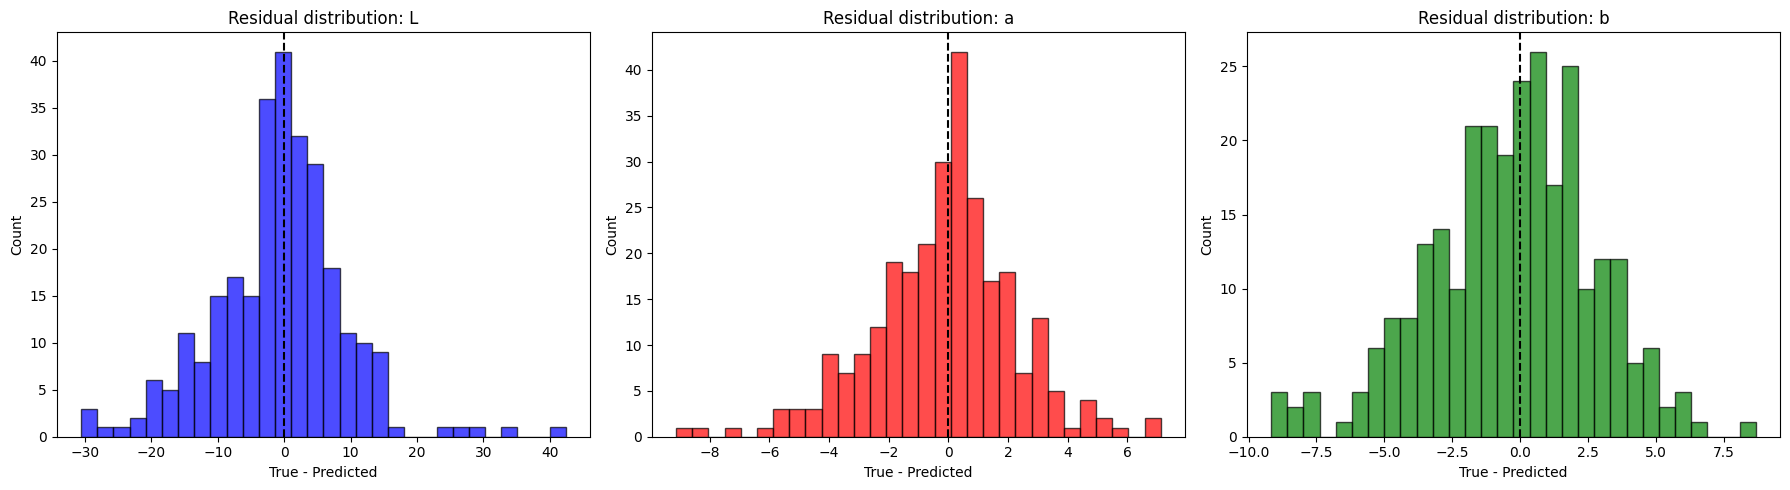

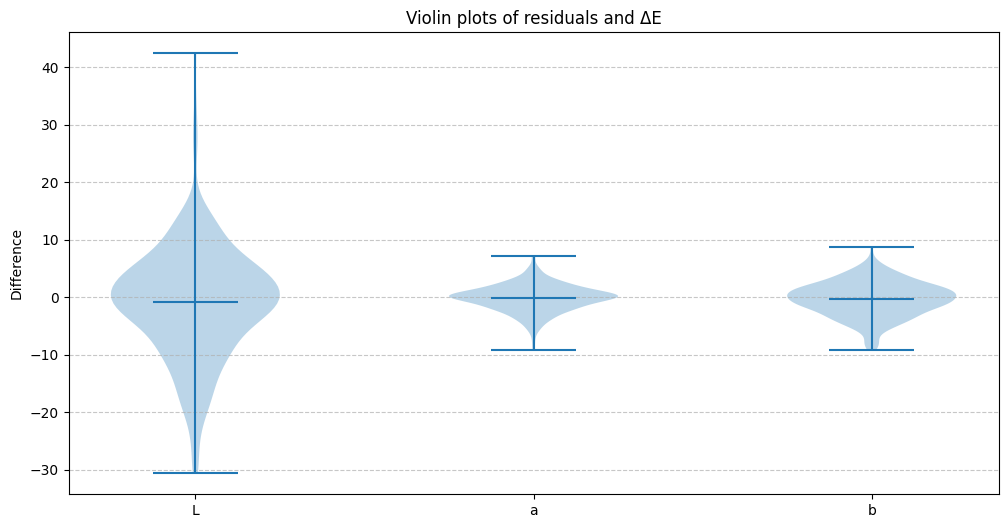

In [343]:
residuals = y_true_array - pred_array

L_residuals = residuals[:, 0]
a_residuals = residuals[:, 1]
b_residuals = residuals[:, 2]

colors = ["blue", "red", "green"]
channels = ["L", "a", "b"]

plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(residuals[:, i], bins=30, color=colors[i], alpha=0.7, edgecolor='black')
    plt.axvline(0, color='black', linestyle='--')
    plt.title(f"Residual distribution: {channels[i]}")
    plt.xlabel("True - Predicted")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


labels = ["L residuals", "a residuals", "b residuals"]

plt.figure(figsize=(12, 6))
plt.violinplot([L_residuals, a_residuals, b_residuals],showmeans=True)
plt.xticks([1,2,3], ["L", "a", "b"])
plt.title("Violin plots of residuals and ΔE")
plt.ylabel("Difference")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

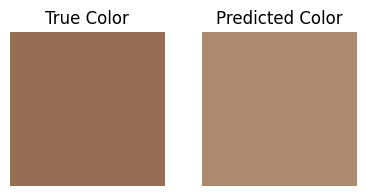

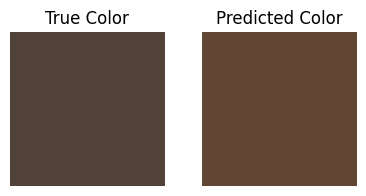

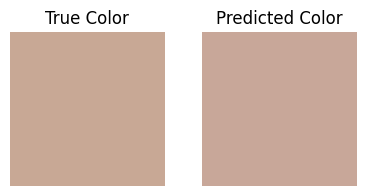

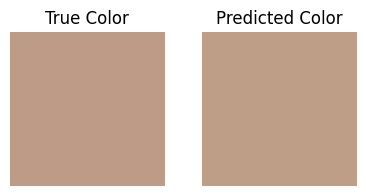

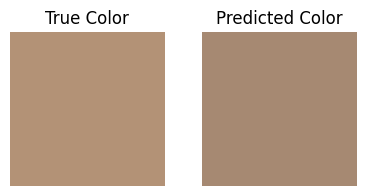

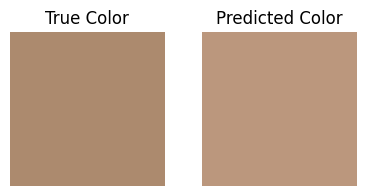

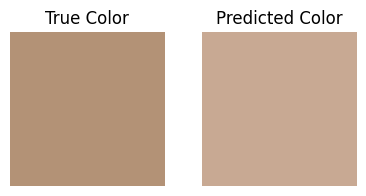

In [344]:
for image_label, image_prediction in zip(y_true_array[:7], pred_array[:7]):
    draw_sample(image_label, image_prediction)